In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
liver = pd.read_csv('liver/liver.csv')

liver.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [3]:
liver.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [4]:
from sklearn.preprocessing import OrdinalEncoder, normalize
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = liver.drop(['Stage'], axis=1)
enc_columns = ['Status', 'Sex', 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
enc_categories = [
    ['C', 'CL', 'D'],
    ['M', 'F'],
    ['Placebo', 'D-penicillamine'],
    ['N', 'Y'],
    ['N', 'Y'],
    ['N', 'Y'],
    ['N', 'S', 'Y'],
]
encoder = OrdinalEncoder(categories=enc_categories)
X[enc_columns] = encoder.fit_transform(X[enc_columns])
X

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2221,0.0,0.0,18499,1.0,0.0,1.0,0.0,0.0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9
1,1230,0.0,0.0,19724,0.0,1.0,0.0,1.0,0.0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8
2,4184,0.0,0.0,11839,1.0,0.0,0.0,0.0,0.0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0
3,2090,2.0,0.0,16467,1.0,0.0,0.0,0.0,0.0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2
4,2105,2.0,0.0,21699,1.0,0.0,1.0,0.0,0.0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,2.0,1.0,23612,1.0,0.0,0.0,0.0,0.0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0
24996,3584,2.0,1.0,23612,1.0,0.0,0.0,0.0,0.0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0
24997,971,2.0,1.0,16736,1.0,0.0,1.0,1.0,2.0,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0
24998,3707,0.0,1.0,16990,1.0,0.0,1.0,0.0,0.0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = liver['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [7]:
from sklearn.metrics import accuracy_score

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.864


In [8]:
# see how n_neighbors affects accuracy
accuracies = []

for n_neighbors in range(1,102):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

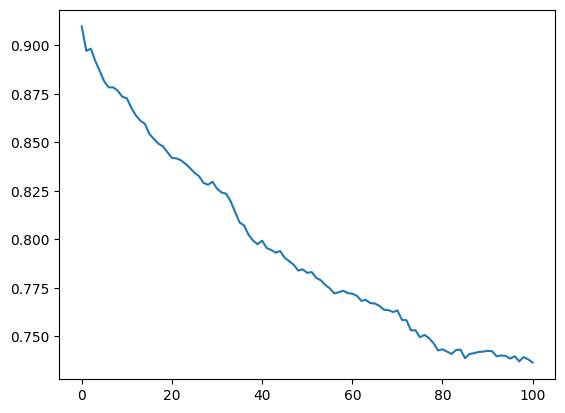

In [9]:
accuracies = pd.Series(accuracies)
accuracies.plot.line()
plt.show()

In [12]:
from sklearn.manifold import TSNE

TSNE = TSNE(n_components = 2, random_state=21)

X_train_subset = X_train[:250]
y_train_subset = y_train[:250]
X_tsne = TSNE.fit_transform(X_train_subset)

X_tsne
# Notice that the length of arrays fell from 64 to 2

array([[-15.520199  ,  -3.3080237 ],
       [-16.769249  ,  -4.298557  ],
       [-17.878675  ,  -0.48069647],
       [ 25.18998   , -10.265953  ],
       [  1.27907   ,   4.174795  ],
       [ 24.832376  ,  -4.4599133 ],
       [ 26.134342  ,   6.134376  ],
       [-21.325495  ,  -2.7824512 ],
       [ 23.506462  ,  -3.682538  ],
       [ 24.976582  ,  -8.026213  ],
       [ 19.035456  ,   1.6922203 ],
       [ 26.101105  ,  -2.109702  ],
       [-22.487114  ,  -4.5901446 ],
       [  0.2161951 ,   6.75721   ],
       [ -3.1738358 ,  -4.7836804 ],
       [-14.364297  ,  13.951081  ],
       [-18.66769   ,   0.56150824],
       [ 14.947811  , -22.56664   ],
       [-15.191418  ,   8.294975  ],
       [ 12.400074  ,   9.512479  ],
       [ 31.77076   ,   6.945474  ],
       [ 28.648973  ,  -8.896097  ],
       [ 32.92676   ,   1.1034536 ],
       [ 22.711357  ,  -2.0918293 ],
       [ 29.334343  ,  -4.577307  ],
       [ -3.0871122 , -15.3036785 ],
       [-22.85078   ,  13.202831  ],
 

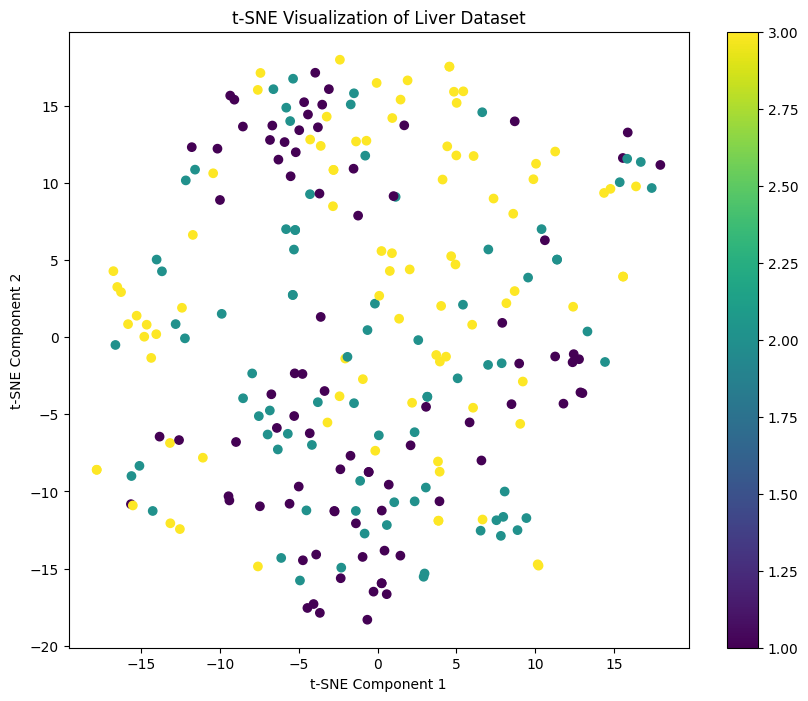

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_subset, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Liver Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()  